In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # supress warnings
warnings.filterwarnings('ignore')
from scikitplot.metrics import plot_roc


In [79]:
df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [82]:
df.head(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513


The data consists of 10,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Let's see the features:

We have 2 kind of data, 'PhotoObj' about photometric data and 'SpecObj' about spectral data. 

* 'objid' is the Object Identifier.

* 'ra' and 'dec' are J2000 Right Ascension (r-band) and J2000 Declination (r-band). Their coordinates.

*  'u', 'g', 'r', 'i', 'z' are the better of DeV/Exp magnitude fit. The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope. Is information about magnitude (brightness) of the objets in each wavelength.

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

* 'run' is which identifies the specific scan.

* 'rerun' specifies how the image was processed.

* 'camcol' is a number from 1 to 6, identifying the scanline within the run.

* 'field' The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs

Now let's see 'SpecObj'.

* 'specobjid' is an Object Identifier.

* 'class' is the object class (galaxy, star or quasar object).

* 'redshift' In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

* 'plate' = plate number.

* 'mjd' is MJD (Modified Julian Dates) of observation. The date of the observation.

* 'fiberid' is fiber ID.

# Exploratory Analysis

In [83]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


We can see that none of the entries are NaN, so cleaning is not necessary.

In [85]:
df.nunique().to_frame().transpose() 

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1,10000,10000,9730,9817,9852,9890,9896,23,1,6,703,6349,3,9637,487,355,892


In [86]:
occurrences = df['class'].value_counts().to_frame().rename(index=str, columns={'class': 'Occurrences'})
occurrences

,Occurrences
GALAXY,4998
STAR,4152
QSO,850


# Some Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


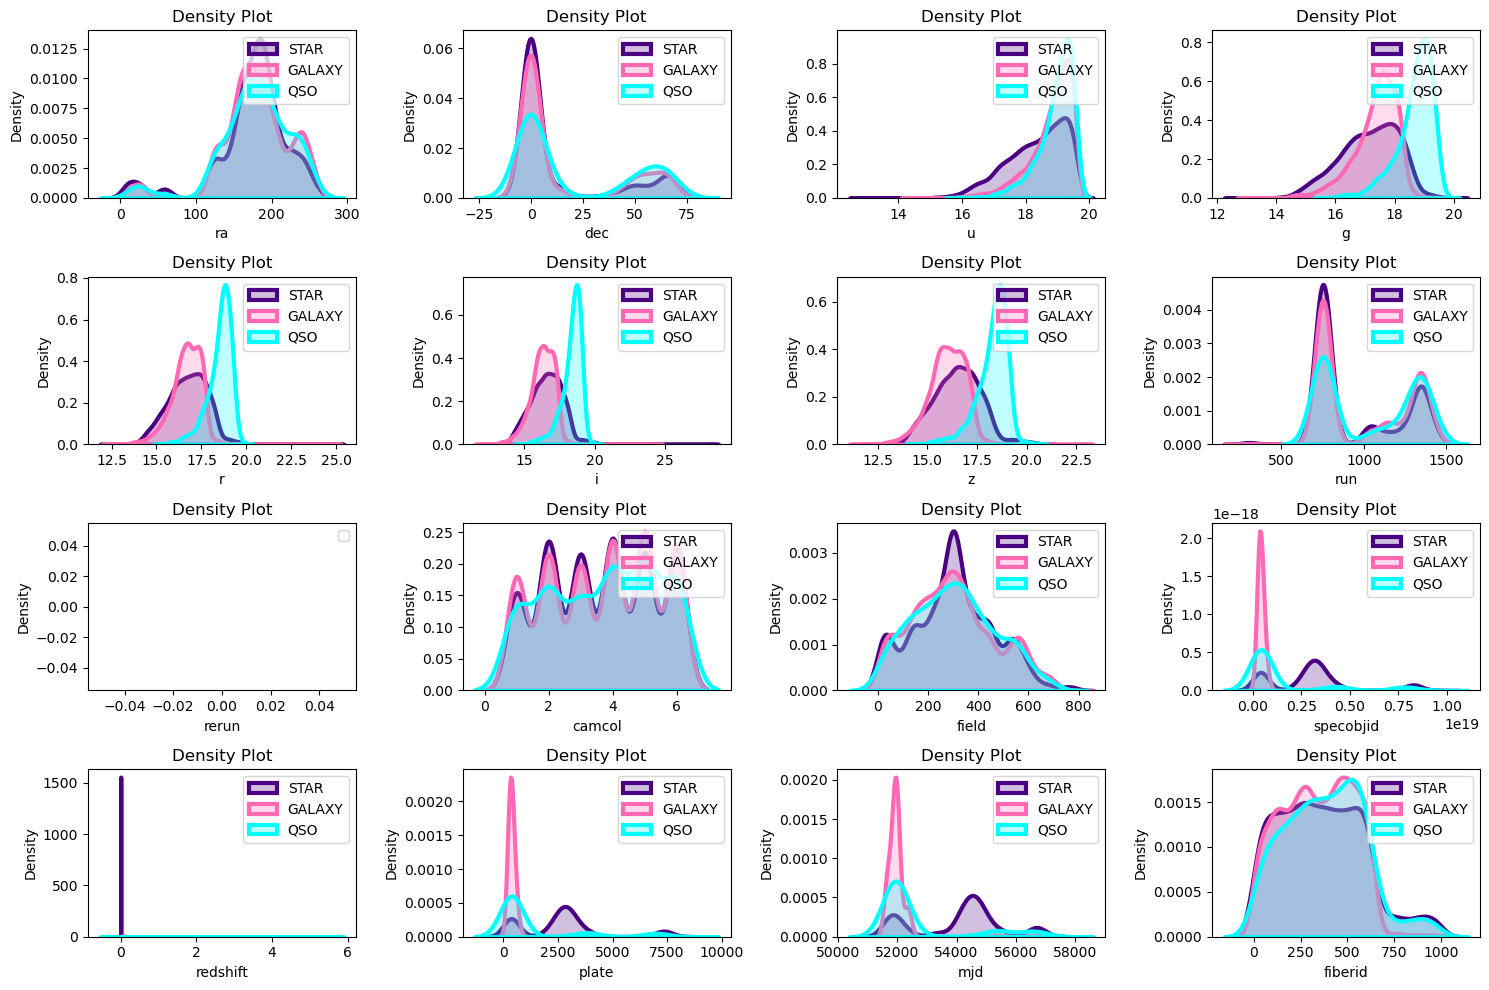

In [87]:
featuredf = df.drop(['class','objid'], axis=1)
featurecols = list(featuredf)
astrObjs = df['class'].unique()
colours = ['indigo', '#FF69B4', 'cyan']
plt.figure(figsize=(15,10))
for i in range(len(featurecols)):
    plt.subplot(4, 4, i+1)
    for j in range(len(astrObjs)):
        sns.distplot(df[df['class']==astrObjs[j]][featurecols[i]], hist = False, kde = True, color = colours[j], kde_kws = {'shade': True, 'linewidth': 3}, label = astrObjs[j])
    plt.legend()
    plt.title('Density Plot')
    plt.xlabel(featurecols[i])
    plt.ylabel('Density')
plt.tight_layout()

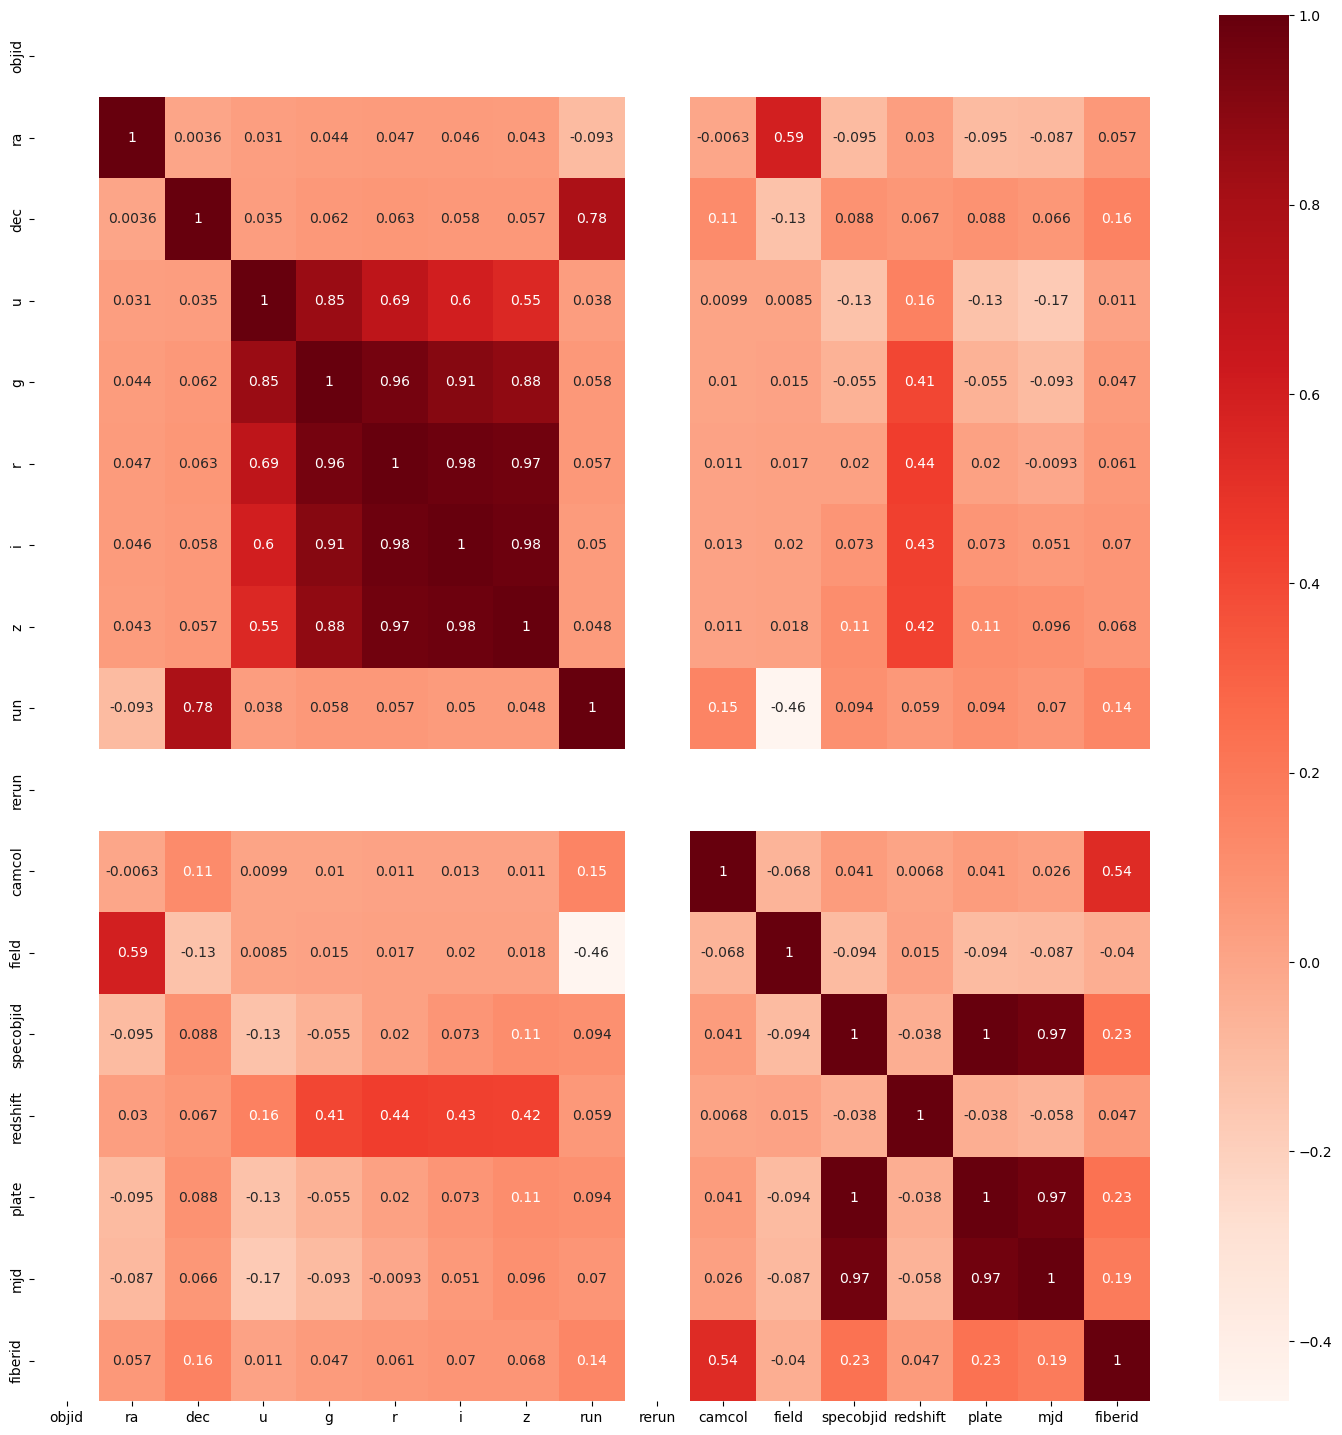

In [88]:
plt.figure(figsize=(18,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [89]:
df.drop(['objid','rerun','specobjid', 'fiberid'],1,inplace=True) 
# Drop the ID's and 'rerun' (the kind of process of the image).

In [90]:
df

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,GALAXY,0.027583,447,51877
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,GALAXY,0.117772,447,51877
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,STAR,-0.000402,7303,57013
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,GALAXY,0.014019,447,51877


In order for the results to be consistent, the models must be exposed to exactly the same cross-validation scheme.
To compare the different algorithms we set up the function `evaluate_performance`, which takes as input an estimator and a string with the name we want to give it, and executes a `cross_val_score`.

In [91]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

## We separate our data into train, validation and test, and standardise them.


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

df["class"].replace("STAR", 0, inplace=True)
df["class"].replace("GALAXY", 1, inplace=True)
df["class"].replace("QSO", 2, inplace=True)

X = df.drop('class', axis=1) 

y = df["class"] 



In [93]:
#------------------------- TRAIN and TEST ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=2)


In [94]:
#------------------------- Standardization ----------------------

MinMaxScaler = preprocessing.MinMaxScaler()
X_train = MinMaxScaler.fit_transform(X_train)   
X_test = MinMaxScaler.transform(X_test)

# APPLY THE CLASSIFICATION ALGORITHMS

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform

In [96]:
def CM(y_test, y_pred):

    confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.ylabel('Real')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
 
    print (classification_report(y_test, y_pred))
    
    return


In [98]:
def Grid_Search(model, H_param, X_train, y_train, X_test, y_test, cv=cv):

    #-------------- Grid Search ---------------------

    grid = GridSearchCV(model, H_param, scoring='accuracy', n_jobs=-1, cv=cv)

    #-------------- Grid Train ----------------------

    result_grid = grid.fit(X_train, y_train)
    # summarize result
    print('Best Score: %s' % result_grid.best_score_)
    print('Best Hyperparameters: %s' % result_grid.best_params_)
    
    y_pred_grid = grid.predict(X_test)

    #Performance
    CM(y_test, y_pred_grid)
    return


In [99]:
def Random_Search(model, H_param, X_train, y_train, X_test, y_test, cv=cv):


#-------------- Random Search ---------------------

    random = RandomizedSearchCV(model, H_param, n_iter=20, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
    # execute search
    result_random = random.fit(X_train, y_train)
    # summarize result
    print('Best Score: %s' % result_random.best_score_)
    print('Best Hyperparameters: %s' % result_random.best_params_)
    
    y_pred_random = random.predict(X_test)


    #Performance
    CM(y_test, y_pred_random)
    return

# Logistic Regresion
---

Firstly we going to train the base model.

In [100]:
#-------------- Define Model -------------------

LR_base = LogisticRegression(random_state=1234)

LR_base.fit(X_train, y_train)

LogisticRegression(random_state=1234)

In [101]:
y_pred_LR_base = LR_base.predict(X_test)

y_pred_LR_base_proba = LR_base.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       830
           1       0.89      0.95      0.91      1000
           2       0.98      0.84      0.91       170

    accuracy                           0.91      2000
   macro avg       0.93      0.89      0.91      2000
weighted avg       0.91      0.91      0.91      2000



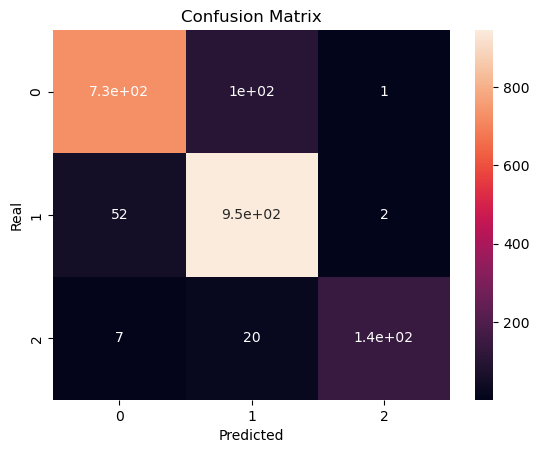

In [102]:
CM(y_test, y_pred_LR_base)

To optimized the hyperparameters we use Grid Search, and obtein the value of penalty, C and solver for the best score.

In [143]:
#-------------- Parameters-----------------------

H_param_LR = dict()
H_param_LR['solver'] = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
H_param_LR['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
H_param_LR['C'] = np.logspace(-5,10,20)


### Grid Search

Best Score: 0.991375
Best Hyperparameters: {'C': 1e-05, 'penalty': 'none', 'solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       830
           1       0.99      0.99      0.99      1000
           2       0.98      0.95      0.96       170

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



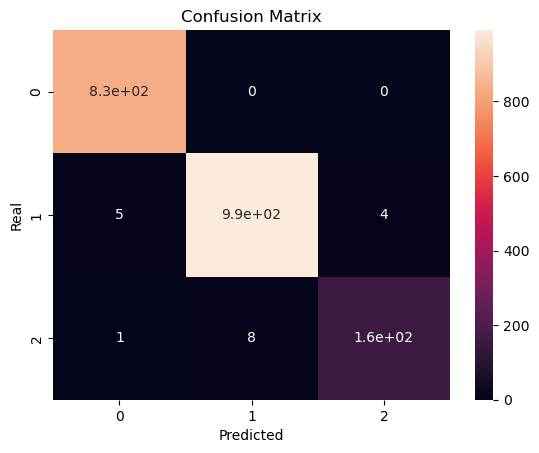

In [105]:
Grid_Search(LR_base, H_param_LR, X_train, y_train, X_test, y_test)

### Random Search

Best Score: 0.98525
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 263665089.87303555}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       830
           1       0.99      0.99      0.99      1000
           2       0.97      0.92      0.94       170

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



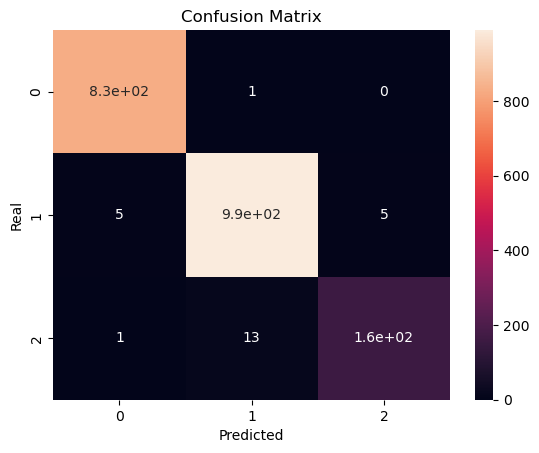

In [144]:
Random_Search(LR_base, H_param_LR, X_train, y_train, X_test, y_test)

## Make the best model

In [132]:
model_LR = LogisticRegression(penalty='none',C=1e-05, solver='newton-cg', random_state=44)
model_LR.fit(X_train, y_train)

print(model_LR.score(X_train, y_train))
print(model_LR.score(X_test, y_test))

0.992625
0.991


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       830
           1       0.99      0.99      0.99      1000
           2       0.98      0.95      0.96       170

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



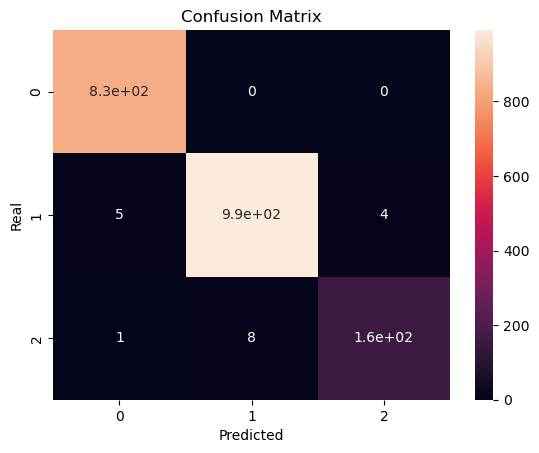

In [133]:
y_pred_LR = model_LR.predict(X_test)
y_pred_proba_LR = model_LR.predict_proba(X_test)

CM(y_test,y_pred_LR)




Exactly the same that obtain be Grid.

In [109]:
print(model_LR.coef_)
print(model_LR.intercept_)

[[ 1.10808519e-01 -5.18782722e-01  6.38765478e+00 -9.74906450e+00
  -2.54565782e+00  2.56570910e+00  6.12930718e+00  9.23373006e-01
   3.31105894e-01  3.10990701e-01 -6.18308806e+03  2.13440697e-02
   9.08619910e-01]
 [ 2.34352956e-01  2.63114293e-01  2.19043740e+01 -2.73116912e+01
  -1.91565157e+01  2.52792134e+00  2.43546472e+01 -3.12357449e-03
  -4.10071339e-01 -1.64657846e-01  3.06157002e+03 -4.08587344e+00
   2.98038139e+00]
 [-3.45161341e-01  2.55668705e-01 -2.82920286e+01  3.70607558e+01
   2.17021736e+01 -5.09363038e+00 -3.04839543e+01 -9.20249090e-01
   7.89655931e-02 -1.46333009e-01  3.12151804e+03  4.06452924e+00
  -3.88900153e+00]]
[ 8.44528312 -7.29124069 -1.15404227]


# XGB
---

XGBoost stands for Extreme Gradient Boosting; it is a specific implementation of the Gradient Boosting method that uses more accurate approximations to find the best tree model. It employs a number of improvements, the most important of which are:

1. It calculates second order gradients, i.e. second partial derivatives of the loss function (similar to Newton's method), which provides more information about the direction of the gradients and how to reach the minimum of our loss function. While gradient boosting uses the loss function of our base model (e.g. decision tree) as a proxy to minimize the overall model error, XGBoost uses the second order derivative as an approximation.

2. L1 and L2 regularization, which improves the generalization of the model.

XGBoost has additional advantages: training is very fast and can be paralyse  / distributed across clusters.

One of the improvements of XGBoost is the algorithm for finding splits. XGBoost implements three types of algorithms:

* Exact Greedy: Essentially it is a performant method of trying all possible split points and keeping the best one. This method is much slower than the next two.

* Approximate: This algorithm does not test all possible split points but only takes the percentiles of each variable and tests them. The bins are recalculated at each iteration.

* Histogram: the values of the continuous variables are stored in bins of a histogram, and reused throughout the computations. Then, the split is made between the histogram bins. It allows between 2 and 256 bins.

And more!
* Shrinkage (eta): basically this parameter removes weight from each new tree added to the assembly, multiplying its influence by a constant. 

* Column sampling: in the same way as Random Forest, this library implements column sampling to reduce overfitting and increase tree variability. 

* Row sampling (subsample): allows you to define what proportion of the rows are used to train each tree. 

* Absence of data: XGBoost will assign a default address to the null values in each node. That is, it will group them with the values to the left or to the right of the split, depending on which direction gives the best results.

In [110]:
from xgboost.sklearn import XGBClassifier


XGB_base = XGBClassifier()

XGB_base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [111]:
y_pred_XGB_base = XGB_base.predict(X_test)

y_pred_XGB_base_proba = XGB_base.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       830
           1       0.99      0.99      0.99      1000
           2       0.95      0.95      0.95       170

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



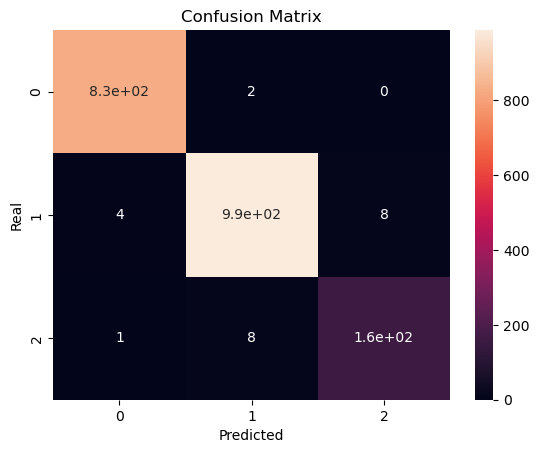

In [112]:
CM(y_test, y_pred_XGB_base)

In [115]:
H_params_XGB = {  
    'min_child_weight': [i for i in range(0,3)],
    'gamma': [i/10.0 for i in range(0,3)],
    'subsample':  [i/10.0 for i in range(8,12)],
    'colsample_bytree': [i/10.0 for i in range(7,10)],
    'reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 3],
    'max_depth':[i for i in range(3,6)],
    "n_estimators": [160, 175, 185, 200], 
    "eta": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}    



Best Score: 0.9928750000000001
Best Hyperparameters: {'colsample_bytree': 0.7, 'eta': 0.5, 'gamma': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 175, 'reg_alpha': 0, 'subsample': 0.9}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       830
           1       0.99      0.99      0.99      1000
           2       0.97      0.94      0.96       170

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



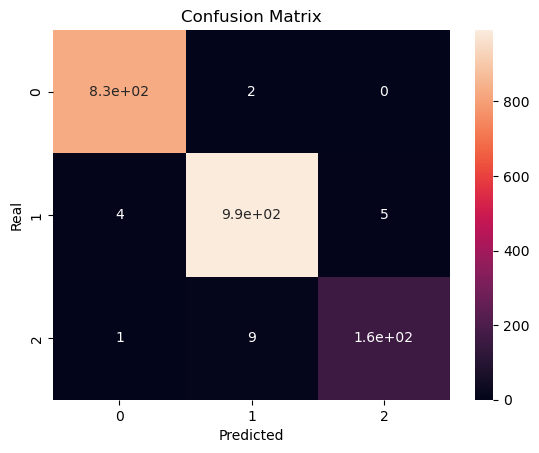

In [116]:
Grid_Search(XGB_base, H_params_XGB, X_train, y_train, X_test, y_test)

Make a Random Search

Best Score: 0.992125
Best Hyperparameters: {'subsample': 0.8, 'reg_alpha': 0.01, 'n_estimators': 200, 'min_child_weight': 0, 'max_depth': 3, 'gamma': 0.2, 'eta': 0.1, 'colsample_bytree': 0.9}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       830
           1       0.99      0.99      0.99      1000
           2       0.97      0.95      0.96       170

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



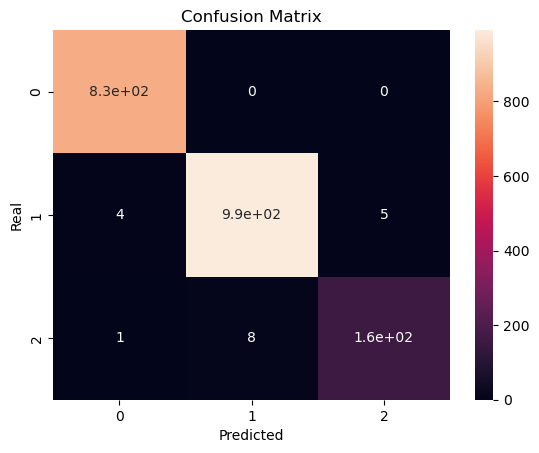

In [117]:
Random_Search(XGB_base, H_params_XGB, X_train, y_train, X_test, y_test)

Make the best model

In [123]:
model_XGB = XGBClassifier(colsample_bytree= 0.7, eta= 0.5, gamma= 0.2, max_depth= 5, min_child_weight= 1, n_estimators= 175, reg_alpha= 0,subsample= 0.9)

model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric=None,
              feature_types=None, gamma=0.2, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=175, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       830
           1       0.99      0.99      0.99      1000
           2       0.97      0.94      0.96       170

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



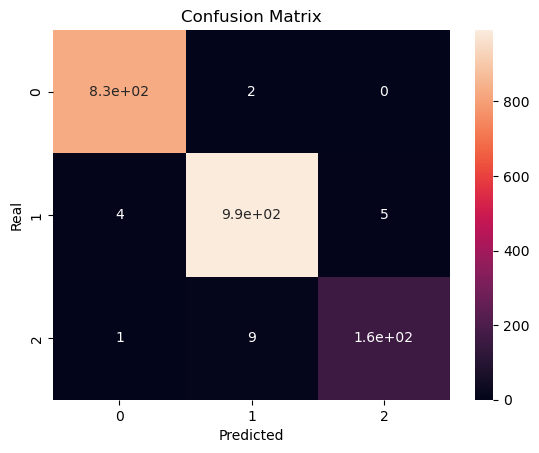

In [124]:
y_pred_XGB = model_XGB.predict(X_test)
y_pred_proba_XGB = model_XGB.predict_proba(X_test)

CM(y_test,y_pred_XGB)


# Let's see how effective our best model is with each of the classes.


Remember that while more close are our cure of the "precfect curve" (max specificity and max sensitivity), best is the perforformance of the model (and umbrals).

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_roc_5.png" alt="Drawing" style="width: 300px;"/>

Let´s see the performance of each one

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

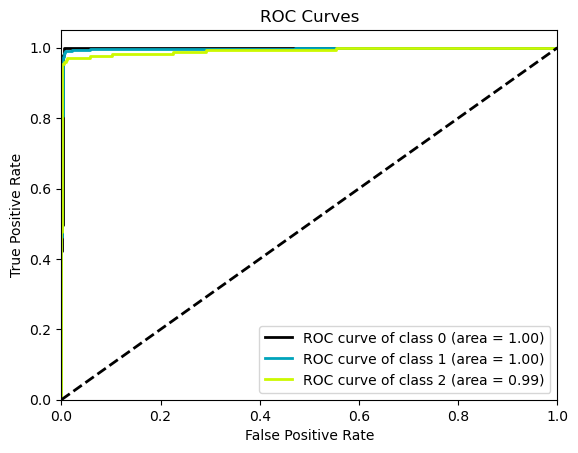

In [146]:
plot_roc(y_test, y_pred_proba_LR, plot_micro = False, plot_macro= False)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

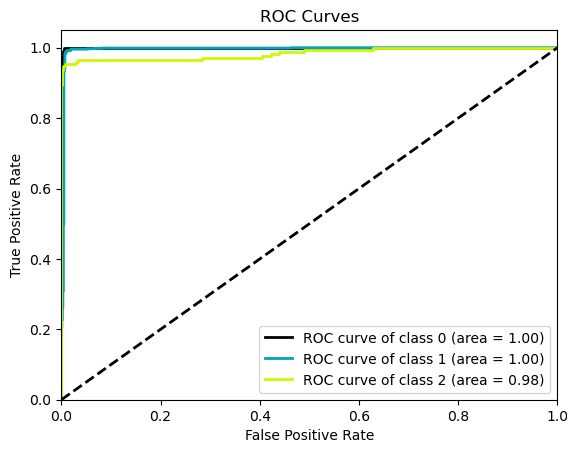

In [145]:
plot_roc(y_test, y_pred_proba_XGB, plot_micro = False, plot_macro= False)

# Feature Importance
---

Feature: 0, Score: 0.00567
Feature: 1, Score: 0.00824
Feature: 2, Score: 0.02703
Feature: 3, Score: 0.05548
Feature: 4, Score: 0.00979
Feature: 5, Score: 0.03164
Feature: 6, Score: 0.12406
Feature: 7, Score: 0.00855
Feature: 8, Score: 0.00364
Feature: 9, Score: 0.00616
Feature: 10, Score: 0.41661
Feature: 11, Score: 0.29495
Feature: 12, Score: 0.00820


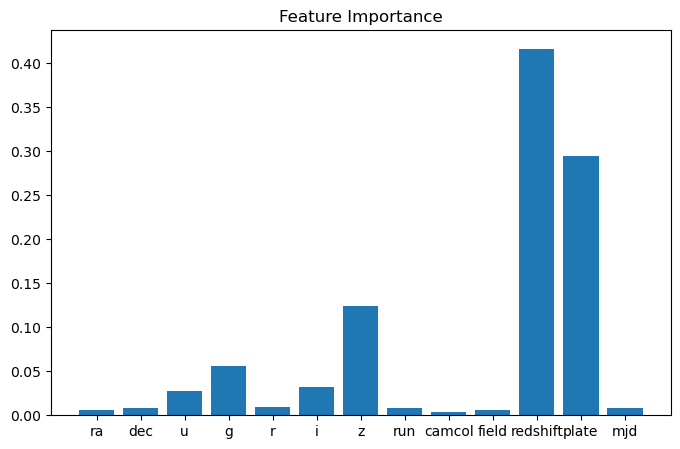

In [140]:
importance_XGB = model_XGB.feature_importances_
for i,v in enumerate(importance_XGB):
    print('Feature: %0d, Score: %.5f' % (i,v))

Features =  X.columns

plt.figure(figsize=(8,5))
plt.bar(Features, importance_XGB )
plt.title("Feature Importance")
plt.show()

What happen if dropping the feature "redshift" of the model?

In [126]:
X2 =df.drop(["class","redshift"], axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, stratify=y, test_size=0.20, random_state=2)
MinMaxScaler = preprocessing.MinMaxScaler()
X_train2 = MinMaxScaler.fit_transform(X_train2)   
X_test2 = MinMaxScaler.transform(X_test2)

In [141]:
model_XGB_2 = XGBClassifier(colsample_bytree= 0.8, gamma= 0.1, learning_rate= 0.1, max_depth= 4, min_child_weight= 1, n_estimators= 175, subsample= 1.0)
model_XGB_2.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=175, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       830
           1       0.95      0.95      0.95      1000
           2       0.90      0.88      0.89       170

    accuracy                           0.94      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.94      0.94      0.94      2000



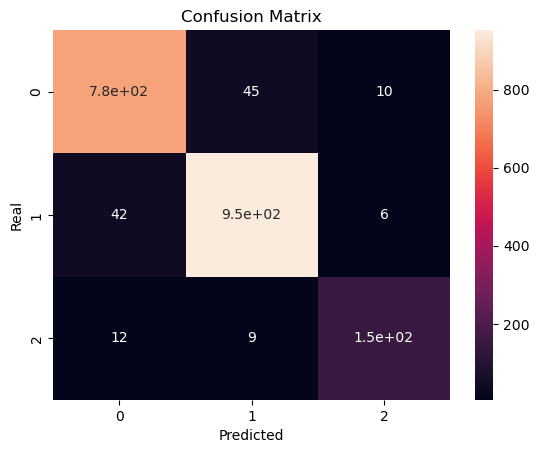

In [142]:
CM(y_test2,model_XGB_2.predict(X_test2))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

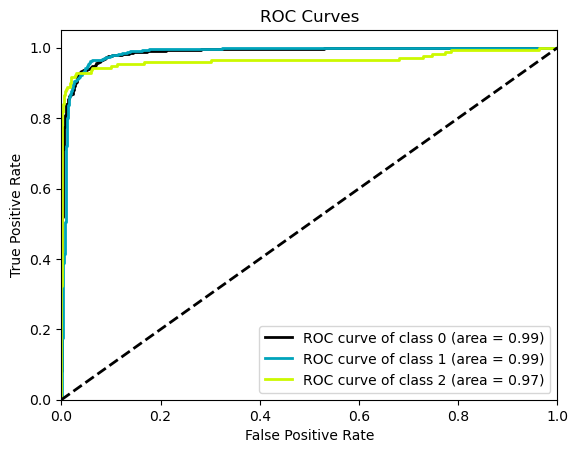

In [129]:
plot_roc(y_test2, model_XGB_2.predict_proba(X_test2), plot_micro = False, plot_macro= False)